<a href="https://colab.research.google.com/github/bea-dom/TelecomX_Part2/blob/main/TelecomX_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, f1_score

#📌 Extração

Vamos utilizar os dados tratados na primeira etapa desse projeto, que foram salvos no arquivo csv salvo nos arquivos desse projeto. Para isso usaremos  a função `pd.read_csv` para carregar esses dados em um dataset, que será salvo na variável `dados`

In [128]:
dados = pd.read_csv('/content/TelecomX_Tratado.csv')
dados.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDay
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333


## Validando o Dataset

Vamos ver como os dados estão distribuidos em linhas e colunas

In [129]:
dados.shape

(7267, 22)

Vamos verificar qual tipo de dado está sendo armazenado em cada coluna:

In [130]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# 🔧 Transformação

## Excluindo dados irrelevantes
O identificador de cada cliente não é útil em uma análise geral, portanto, para otimizar o processamento dos dados essa coluna será removida do dataset a ser utilizado no restante do projeto.

A coluna 'chargesDay' por ser 100% derivada de outra coluna ('ChargesMonthly') se torna reduntante e por isso pode ser desconsiderada da análise.

Por fim, os registros de clientes cuja a informação de 'Churn' estiver nula também não são úteis e serão removidos.

In [131]:
dados = dados.drop(columns=['customerID','ChargesDay'])
dados.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,False,Female,False,True,True,9,True,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,False,Male,False,False,False,9,True,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,True,Male,False,False,False,4,True,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,True,Male,True,True,False,13,True,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,True,Female,True,True,False,3,True,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [132]:
dados = dados.dropna(subset=['Churn'])
dados['Churn'].unique()

array([False, True], dtype=object)

## Encoding

Os algoritmos de Machine Learning que usaremos só conseguem trabalhar com dados numéricos, porém muitas informações importantes da base estão em formato textual.

O encoding transforma essas categorias textuais em números, permitindo que o modelo compreenda e utilize esses dados para aprender e fazer previsões.

Para isso utilizaremos o método de encoding One-Hot que ajuda a garantir que o modelo interprete corretamente as categorias, sem assumir relações de ordem ou magnitude que não existem, preservando a integridade e a precisão dos resultados.

### Separação das informações da Variável Alvo

In [133]:
vr0 = dados.Churn
df0 = dados.drop(columns=['Churn'], axis = 1)

In [134]:
colunas = df0.columns
colunas

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesMonthly', 'ChargesTotal'],
      dtype='object')

### Encoding informações

In [135]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod' ]
),
    remainder='passthrough',
    sparse_threshold=0 )

In [136]:
df1 = one_hot.fit_transform(df0)

In [137]:
x = pd.DataFrame(df1, columns=one_hot.get_feature_names_out(colunas))
x.head()

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_True,onehotencoder__Partner_True,onehotencoder__Dependents_True,onehotencoder__PhoneService_True,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_True,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__ChargesMonthly,remainder__ChargesTotal
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.0,1237.85
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40


### Encoding Variável Alvo

In [138]:
label_encoder = LabelEncoder()

In [139]:
y= label_encoder.fit_transform(vr0)

# 🎯 Correlação e Seleção de Variáveis

## Proporção geral de Churn

In [ ]:
contagem_churn = df['Churn'].value_counts()
contagem_churn.index = ['Sem Churn', 'Com Churn']
contagem_churn

,count
Sem Churn,5174
Com Churn,1869


<Axes: title={'center': 'Contagem de clientes'}>

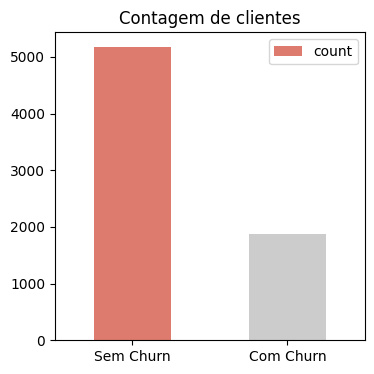

In [ ]:
contagem_churn.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Contagem de clientes',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção de clientes'}, ylabel='count'>

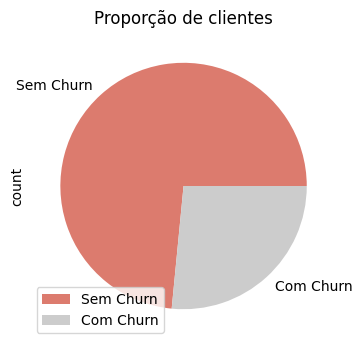

In [ ]:
contagem_churn.plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de clientes',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

## Análise do Churn pelo perfil do cliente

### Gênero

Com as análises abaixo é possível concluir que, apesar da taxa de evasão ser um pouco inferior entre clientes homens, a proporção de churn entre os generos é bem equilibrada

In [ ]:
genero = df.groupby('gender')['Churn'].value_counts().unstack()
genero.columns = ['Sem_Churn', 'Com_Churn']
genero

/tmp/ipython-input-2716481865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genero = df.groupby('gender')['Churn'].value_counts().unstack()


,Sem_Churn,Com_Churn
gender,,
Female,2549,939
Male,2625,930


<Axes: title={'center': 'Quantidade de clientes por gênero'}, xlabel='gender'>

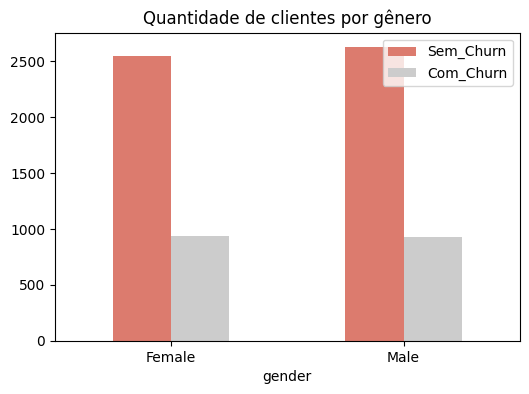

In [ ]:
genero.plot(
    kind='bar',
    color=[rosa,cinzaEscuro],  # cores para False e True
    figsize=(6,4),
    rot=0,
    title='Quantidade de clientes por gênero'
)

<Axes: title={'center': 'Proporção de Churn por clientes Homens'}, ylabel='Male'>

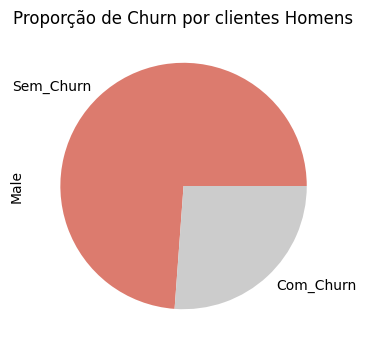

In [ ]:
genero.loc['Male'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de Churn por clientes Homens',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção de Churn por clientes Mulheres'}, ylabel='Female'>

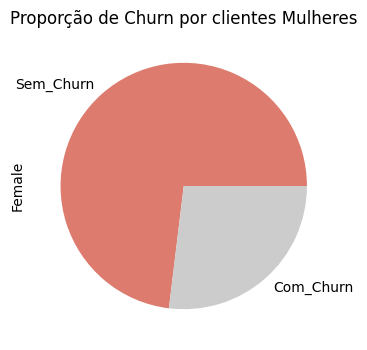

In [ ]:
genero.loc['Female'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de Churn por clientes Mulheres',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção de genero com Churn'}, ylabel='Com_Churn'>

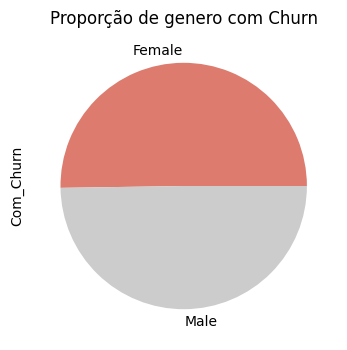

In [ ]:
genero.Com_Churn.plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de genero com Churn',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

### Em clientes idosos

Com as análises abaixo é possível observar que, apesar da maior volumetria dos Churns ser entre clientes com menos de 65 anos, a taxa de evasão entre clientes idosos (+65 anos) é consideravelmente superior que nos demais clientes,

In [ ]:
idosos = pd.crosstab(df['SeniorCitizen'],df['Churn'])
idosos.columns = ['Sem_Churn','Com_Churn']
idosos.index = ['Menos_65anos', 'Mais_65anos']
idosos

,Sem_Churn,Com_Churn
Menos_65anos,4508,1393
Mais_65anos,666,476


<Axes: title={'center': 'Quantidade de Churn por genero'}>

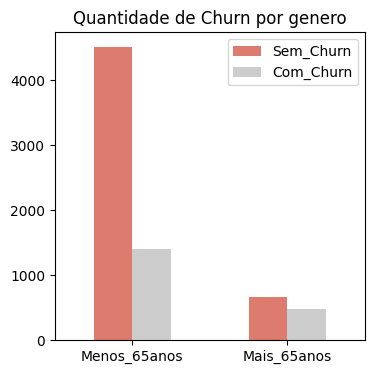

In [ ]:
idosos.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por genero',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção Churn em clientes com -65 anos'}, ylabel='Menos_65anos'>

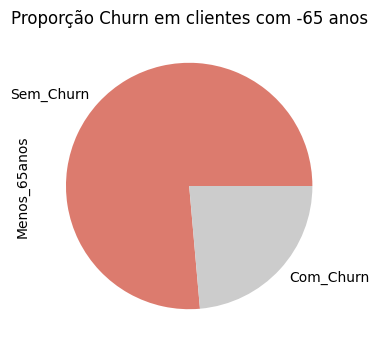

In [ ]:
idosos.loc['Menos_65anos'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção Churn em clientes com -65 anos',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção Churn em clientes com +65 anos'}, ylabel='Mais_65anos'>

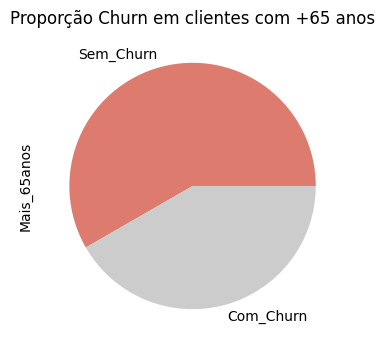

In [ ]:
idosos.loc['Mais_65anos'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção Churn em clientes com +65 anos',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

### Estado civil

Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes sem parceiros, e que estes representam grande parte dos casos de Churn

In [ ]:
Parceiro = pd.crosstab(df['Partner'],df['Churn'])
Parceiro.columns = ['Sem_Churn','Com_Churn']
Parceiro.index = ['Sem_Parceiro', 'Com_parceiro']

<Axes: title={'center': 'Quantidade de Churn por estado civil'}>

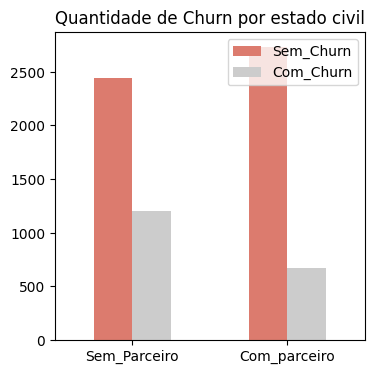

In [ ]:
Parceiro.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por estado civil',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
Parceiro['% Churn'] = Parceiro['Com_Churn'] / (Parceiro['Com_Churn']+Parceiro['Sem_Churn'])
Parceiro

,Sem_Churn,Com_Churn,% Churn
Sem_Parceiro,2441,1200,0.329580
Com_parceiro,2733,669,0.196649


### Dependentes

Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes sem dependentes, e que estes representam grande parte dos casos de Churn

In [ ]:
Dependents = pd.crosstab(df['Dependents'],df['Churn'])
Dependents.columns = ['Sem_Churn','Com_Churn']
Dependents.index = ['Sem_Dependents', 'Com_Dependents']

<Axes: title={'center': 'Quantidade de Churn por clientes com e sem Dependents'}>

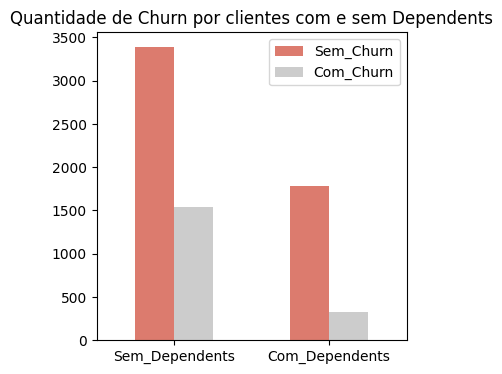

In [ ]:
Dependents.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por clientes com e sem Dependents',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
Dependents['% Churn'] = Dependents['Com_Churn'] / (Dependents['Com_Churn']+Dependents['Sem_Churn'])
Dependents

,Sem_Churn,Com_Churn,% Churn
Sem_Dependents,3390,1543,0.312791
Com_Dependents,1784,326,0.154502


<Axes: title={'center': 'Proporção de clientes com e sem dependentes'}, ylabel='Com_Churn'>

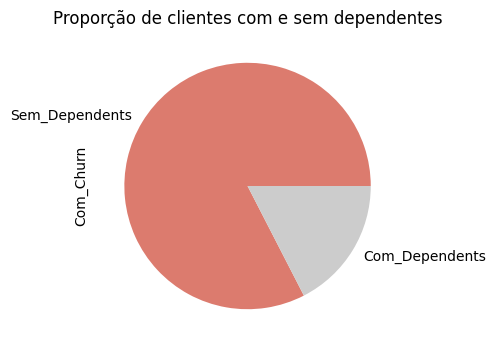

In [ ]:
Dependents.Com_Churn.plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de clientes com e sem dependentes',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

### Tempo de contrato

Notamos que grande parte da evasão está em clientes com menos de 10 meses de contrato

<Axes: title={'center': 'Concentração de Churn por tempo de contrato'}, xlabel='tenure'>

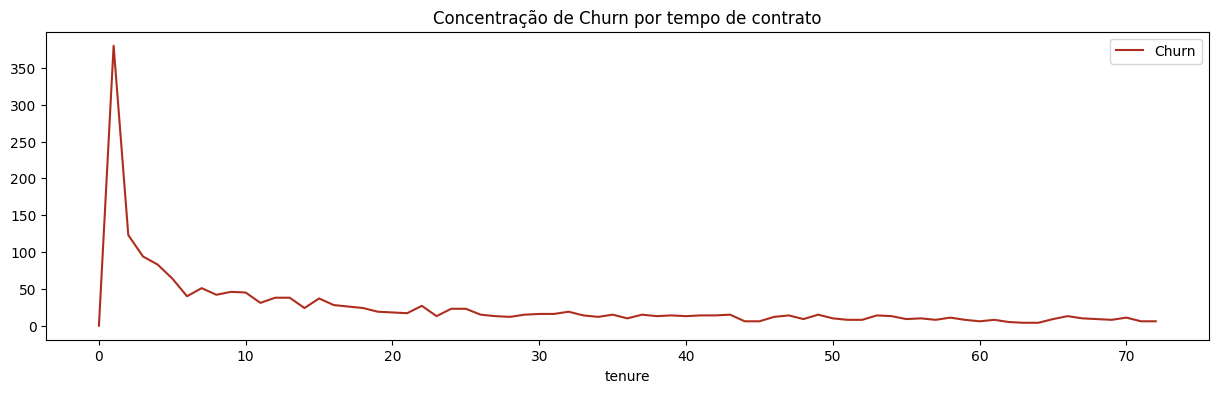

In [ ]:
df.groupby('tenure')['Churn'].sum().plot(
    kind='line',
    color= [rosaEscuro],
    rot=0,
    title='Concentração de Churn por tempo de contrato',  # título do gráfico
    figsize=(15,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

### Tipo de contrato

Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes com contrato mensal, e que estes representam grande parte dos casos de Churn

In [ ]:
Contract = pd.crosstab(df['Contract'],df['Churn'])
Contract.columns = ['Sem_Churn','Com_Churn']
Contract.index = ['Mensal','Um_ano', 'Dois-Anos']

<Axes: title={'center': 'Quantidade de Churn por tipo de contrato'}>

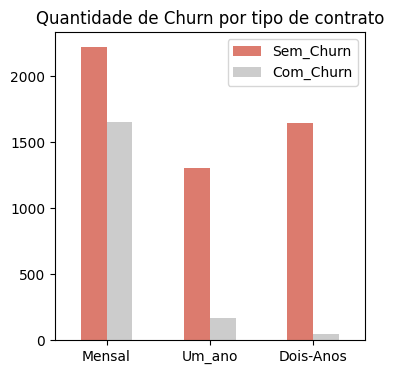

In [ ]:
Contract.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por tipo de contrato',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
Contract['% Churn'] = Contract['Com_Churn'] / (Contract['Com_Churn']+Contract['Sem_Churn'])
Contract

,Sem_Churn,Com_Churn,% Churn
Mensal,2220,1655,0.427097
Um_ano,1307,166,0.112695
Dois-Anos,1647,48,0.028319


### Tipo de cobrança
Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes que escolhem receber cobranças virtuais, e que estes representam grande parte dos casos de Churn

In [ ]:
PaperlessBilling = pd.crosstab(df['PaperlessBilling'],df['Churn'])
PaperlessBilling.columns = ['Sem_Churn','Com_Churn']
PaperlessBilling.index = ['Cobranca_Fisica','Cobranca_Digital']


<Axes: title={'center': 'Quantidade de Churn por tipo de cobrança'}>

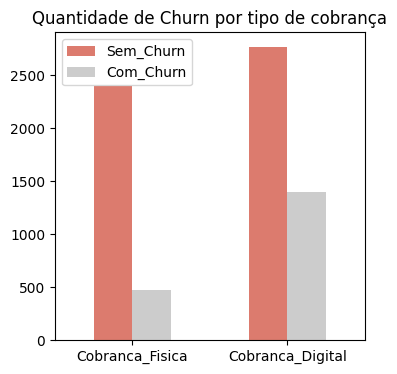

In [ ]:
PaperlessBilling.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por tipo de cobrança',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
PaperlessBilling['% Churn'] = PaperlessBilling['Com_Churn'] / (PaperlessBilling['Com_Churn']+PaperlessBilling['Sem_Churn'])
PaperlessBilling

,Sem_Churn,Com_Churn,% Churn
Cobranca_Fisica,2403,469,0.163301
Cobranca_Digital,2771,1400,0.335651


### Metodo de pagamento
Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes que escolhem pagar as cobranças por 'Electronic check', e que estes representam grande parte dos casos de Churn

In [ ]:
PaymentMethod = pd.crosstab(df['PaymentMethod'],df['Churn'])
PaymentMethod.columns = ['Sem_Churn','Com_Churn']
PaymentMethod

,Sem_Churn,Com_Churn
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


<Axes: title={'center': 'Quantidade de Churn por metodo de pagamento'}, xlabel='PaymentMethod'>

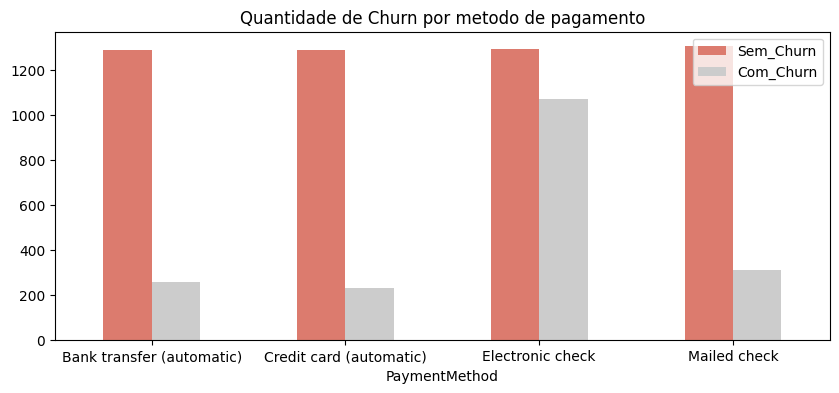

In [ ]:
PaymentMethod.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por metodo de pagamento',  # título do gráfico
    figsize=(10,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
PaymentMethod['% Churn'] = PaymentMethod['Com_Churn'] / (PaymentMethod['Com_Churn']+PaymentMethod['Sem_Churn'])
PaymentMethod

,Sem_Churn,Com_Churn,% Churn
PaymentMethod,,,
Bank transfer (automatic),1286,258,0.167098
Credit card (automatic),1290,232,0.152431
Electronic check,1294,1071,0.452854
Mailed check,1304,308,0.191067


## Análise de Churn pelos serviços contratados

### Serviços de telefonia

Nesta análise é possível notar que, apesar de grande parte dos Churns serem de clientes com serviços de telefonia, a evasão entre dos clientes com serviço de telefonia é muito próxima a de clientes sem serviços de telefonia.

Além disso, dos clientes com serviços de telefonia, a evasão é maior em clientes com multiplas linhas



In [ ]:
PhoneService = pd.crosstab(df['PhoneService'],df['Churn'])
PhoneService.columns = ['Sem_Churn','Com_Churn']
PhoneService.index = ['Sem_Servicos_Telefonicos','Com_Servicos_Telefonicos']
PhoneService

,Sem_Churn,Com_Churn
Sem_Servicos_Telefonicos,512,170
Com_Servicos_Telefonicos,4662,1699


<Axes: title={'center': 'Quantidade de Churn nos serviços telefonicos'}>

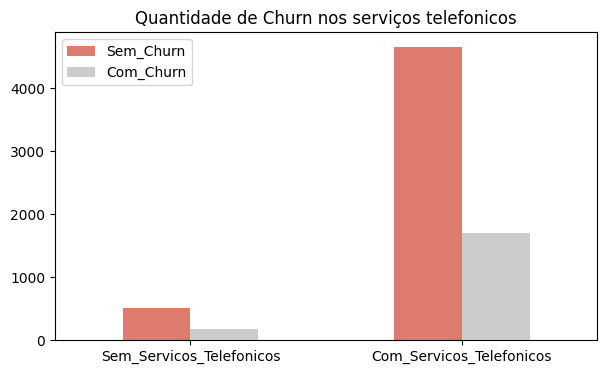

In [ ]:
PhoneService.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn nos serviços telefonicos',  # título do gráfico
    figsize=(7,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
PhoneService['% Churn'] = PhoneService['Com_Churn'] / (PhoneService['Com_Churn']+PhoneService['Sem_Churn'])
PhoneService

,Sem_Churn,Com_Churn,% Churn
Sem_Servicos_Telefonicos,512,170,0.249267
Com_Servicos_Telefonicos,4662,1699,0.267096


In [ ]:
MultipleLines = df.query('PhoneService ==True')
MultipleLines = pd.crosstab(MultipleLines['MultipleLines'],df['Churn'])
MultipleLines.columns = ['Sem_Churn','Com_Churn']
MultipleLines.index = ['Sem_Multiplas_Linhas','Com_Multiplas_Linhas']
MultipleLines


,Sem_Churn,Com_Churn
Sem_Multiplas_Linhas,2541,849
Com_Multiplas_Linhas,2121,850


<Axes: title={'center': 'Churn em clientes com e sem multiplas linhas'}>

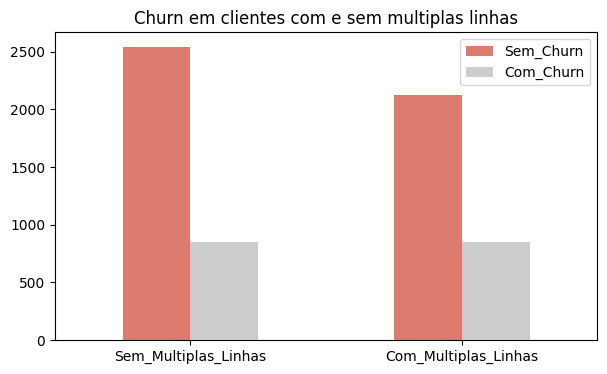

In [ ]:
MultipleLines.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Churn em clientes com e sem multiplas linhas',  # título do gráfico
    figsize=(7,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

### Serviços de Internet

Nessa análise é possível concluir que a taxa de evasão dos clientes que possuem serviços de internet é consideravelmente maior se comparada aos clientes que não possuem.

Além disso, dos clientes que contratam internet, aqueles que a internet é provida por "DSL" tem uma altissima taxa de evasão, muito superior aos clientes de "Fiber Optic".

Por fim, é possível observar também que dentre os clientes com Churn a maioria deles não havia contratado serviços adicionais de, OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport porém cerca de metade dos Churns haviam contratado StreamingTV e StreamingMovies

In [ ]:
InternetService = pd.crosstab(df['InternetService'],df['Churn'])
InternetService.columns = ['Sem_Churn','Com_Churn']
InternetService

,Sem_Churn,Com_Churn
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<Axes: title={'center': 'Quantidade de Churn por fornecedor de telefonia'}, xlabel='InternetService'>

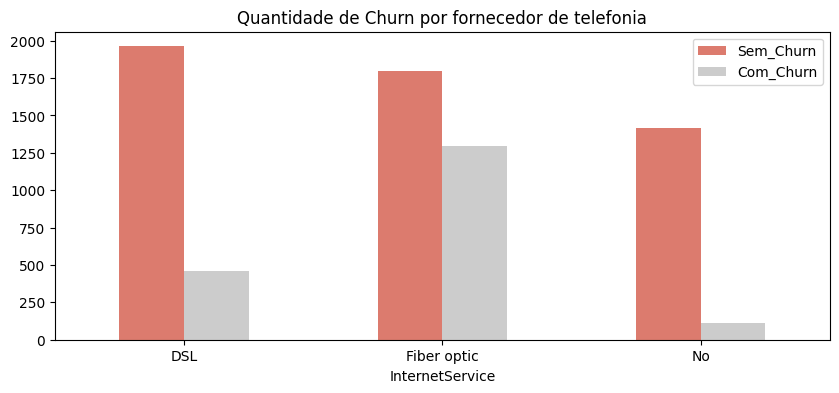

In [ ]:
InternetService.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por fornecedor de telefonia',  # título do gráfico
    figsize=(10,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
InternetService['% Churn'] = InternetService['Com_Churn'] / (InternetService['Com_Churn']+InternetService['Sem_Churn'])
InternetService

,Sem_Churn,Com_Churn,% Churn
InternetService,,,
DSL,1962,459,0.189591
Fiber optic,1799,1297,0.418928
No,1413,113,0.074050


In [ ]:
Internet_on = df.query('InternetService == "DSL" | InternetService == "Fiber optic"')

OnlineSecurity = pd.crosstab(Internet_on['OnlineSecurity'],Internet_on['Churn'])
OnlineBackup = pd.crosstab(Internet_on['OnlineBackup'],Internet_on['Churn'])
DeviceProtection = pd.crosstab(Internet_on['DeviceProtection'],Internet_on['Churn'])
TechSupport = pd.crosstab(Internet_on['TechSupport'],Internet_on['Churn'])
StreamingTV = pd.crosstab(Internet_on['StreamingTV'],Internet_on['Churn'])
StreamingMovies = pd.crosstab(Internet_on['StreamingMovies'],Internet_on['Churn'])

tabelas = {
    'OnlineSecurity': OnlineSecurity[True],
    'OnlineBackup': OnlineBackup[True],
    'DeviceProtection': DeviceProtection[True],
    'TechSupport': TechSupport[True],
    'StreamingTV': StreamingTV[True],
    'StreamingMovies': StreamingMovies[True]
}

servicosAdicionaisInternet = pd.DataFrame(tabelas)
servicosAdicionaisInternet

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,1461,1233,1211,1446,942,938
Yes,295,523,545,310,814,818


# 🤖 Modelagem Preditiva

### Separação de Dados

In [140]:
x_treino, x_teste, y_treino, y_teste = train_test_split ( x, y, stratify = y)

### Modelo Base

O modelo Dummy será utilizado como uma linha de base para comparação. Como esse modelo não realiza aprendizado real seu resultado servirá somente para comparar se os modelos treinados estão realmente aprendendo padrões relevantes ou apenas reproduzindo tendências superficiais dos dados.

In [141]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7348097671777399

### Árvore de Decisão

A escolhida desse modelo foi por sua capacidade de interpretar facilmente os dados e gerar regras claras de decisão. Além disso, por lidar bem com variáveis categóricas e não requer normalização dos dados, ele se torna uma opção prática e eficiente para análise de tabelas com muitos dados categoricos, como é o caso a base de clientes da Telecom X

In [187]:
arvore = DecisionTreeClassifier(max_depth=3)
arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(max_depth=3)

In [188]:
arvore.score(x_teste, y_teste)

0.794434980124929

[Text(0.5, 0.9, 'x[29] <= 0.5\ngini = 0.39\nsamples = 5282\nvalue = [3880, 1402]'),
 Text(0.25, 0.7, 'x[11] <= 0.5\ngini = 0.122\nsamples = 2370\nvalue = [2216, 154]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[38] <= 93.825\ngini = 0.071\nsamples = 1728\nvalue = [1664, 64]'),
 Text(0.0625, 0.3, 'x[35] <= 0.5\ngini = 0.049\nsamples = 1436\nvalue = [1400, 36]'),
 Text(0.03125, 0.1, 'gini = 0.039\nsamples = 1302\nvalue = [1276, 26]'),
 Text(0.09375, 0.1, 'gini = 0.138\nsamples = 134\nvalue = [124, 10]'),
 Text(0.1875, 0.3, 'x[37] <= 70.5\ngini = 0.173\nsamples = 292\nvalue = [264, 28]'),
 Text(0.15625, 0.1, 'gini = 0.242\nsamples = 192\nvalue = [165, 27]'),
 Text(0.21875, 0.1, 'gini = 0.02\nsamples = 100\nvalue = [99, 1]'),
 Text(0.375, 0.5, 'x[38] <= 99.875\ngini = 0.241\nsamples = 642\nvalue = [552.0, 90.0]'),
 Text(0.3125, 0.3, 'x[37] <= 22.5\ngini = 0.194\nsamples = 459\nvalue = [409, 50]'),
 Text(0.28125, 0.1, 'gini = 0.352\nsamples = 57\nvalue = [44, 13]'),
 Text(0.34375, 0

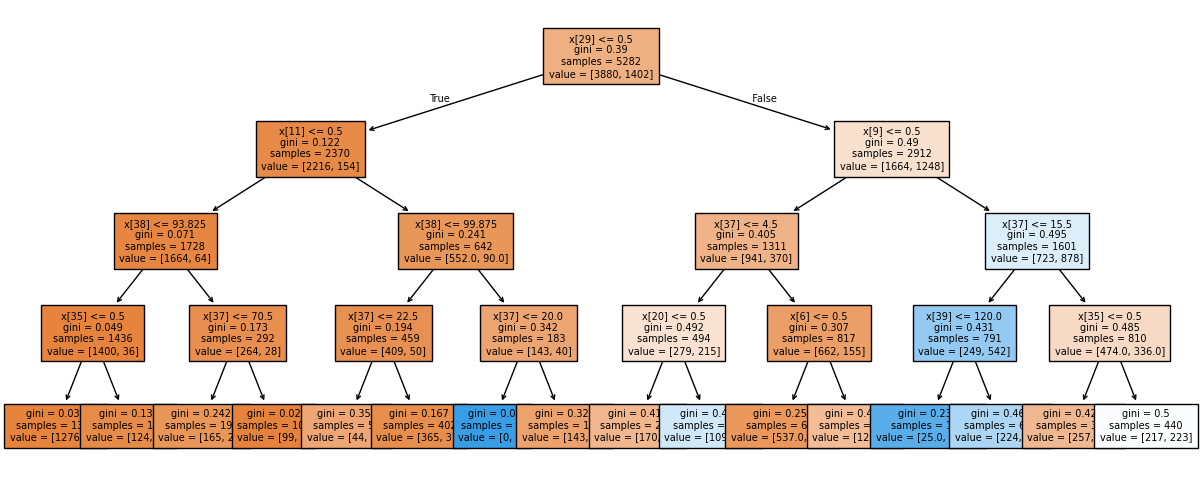

In [151]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True, fontsize = 7)

### KNN

O modelo KNN foi incluído com o objetivo de comparar o desempenho entre algoritmos que exigem normalização dos dados e aqueles que não exigem, como a Árvore de Decisão. O KNN é sensível à escala das variáveis, pois baseia suas previsões na distância entre os pontos. Essa característica permite avaliar o impacto da normalização no desempenho do modelo e entender melhor como diferentes algoritmos lidam com a estrutura dos dados.


#### Normalização dos dados de treino

Para criar o modelo adequadamente os registros com valores nulos foram excluídos para evitar erros no cálculo de distâncias do KNN.
Além disso base precisou ser normalizada para garantir que todas as variáveis tenham influência equilibrada na proximidade entre instâncias.

In [160]:
df_sem_nulos = dados.dropna()

In [161]:
vr_0 = df_sem_nulos.Churn
df_0 = df_sem_nulos.drop(columns=['Churn'], axis = 1)

colunas_sn = df_0.columns

one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod' ]
),
    remainder='passthrough',
    sparse_threshold=0 )

df_1 = one_hot.fit_transform(df_0)

x_sn = pd.DataFrame(df_1, columns=one_hot.get_feature_names_out(colunas_sn))
x_sn.head()

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_True,onehotencoder__Partner_True,onehotencoder__Dependents_True,onehotencoder__PhoneService_True,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_True,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__ChargesMonthly,remainder__ChargesTotal
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.0,1237.85
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40


In [162]:
y_sn= label_encoder.fit_transform(vr_0)

In [163]:
x_treino_sn, x_teste_sn, y_treino_sn, y_teste_sn = train_test_split ( x_sn, y_sn, stratify = y_sn)

In [164]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino_sn)
x_teste_normalizado = normalizacao.fit_transform(x_teste_sn)

#### Algoritmo

In [165]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino_sn)

KNeighborsClassifier()

In [167]:
knn.score(x_teste_normalizado,y_teste_sn)

0.7656427758816837

## Avaliação dos Modelo

### Acurácia

In [189]:
print(f'Acurácia Dummy:{dummy.score(x_teste,y_teste)}')
print(f'Acurácia Árvore:{arvore.score(x_teste,y_teste)}')
print(f'Acurácia KNN:{knn.score(x_teste_normalizado,y_teste_sn)}')

Acurácia Dummy:0.7348097671777399
Acurácia Árvore:0.794434980124929
Acurácia KNN:0.7656427758816837


### Matriz de Confusão

In [211]:
# Previsões
y_pred_dummy = dummy.predict(x_teste)
y_pred_arvore = arvore.predict(x_teste)
y_pred_knn = knn.predict(x_teste_normalizado)

matriz_confusao_dummy = confusion_matrix(y_teste, y_pred_dummy)
matriz_confusao_arvore = confusion_matrix(y_teste, y_pred_arvore)
matriz_confusao_knn = confusion_matrix(y_teste_sn, y_pred_knn)

visualizacao_dummy = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_dummy, display_labels=['Sem Churn', 'Com Churn'])
visualizacao_arvore = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_arvore, display_labels=['Sem Churn', 'Com Churn'])
visualizacao_knn = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_knn, display_labels=['Sem Churn', 'Com Churn'])

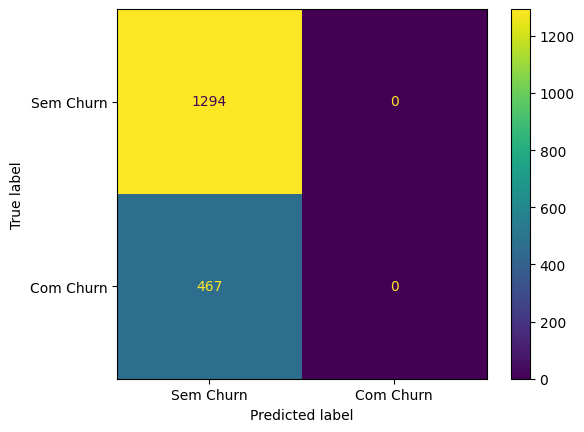

In [212]:
visualizacao_dummy.plot();

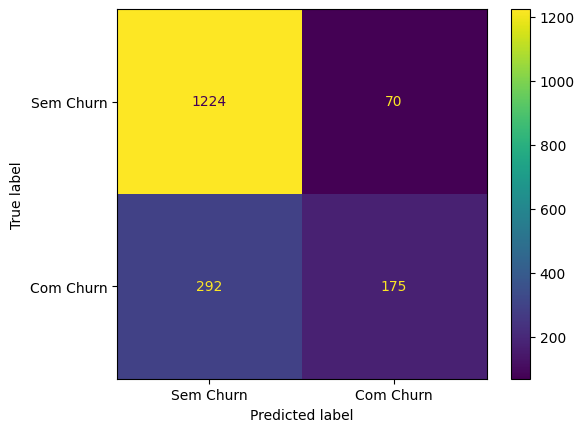

In [213]:
visualizacao_arvore.plot()

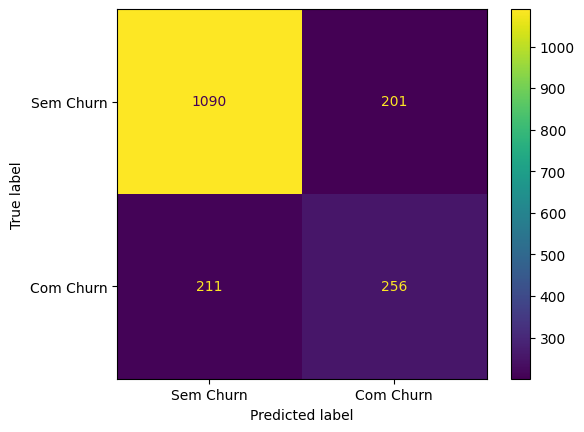

In [214]:
visualizacao_knn.plot()

### Precisão

indica quantas das previsões positivas feitas pelo modelo estavam corretas. É útil quando o custo de um falso positivo é alto.

In [216]:
print(f'Precisão Dummy:{precision_score(y_teste, y_pred_dummy)}');
print(f'Precisão Árvore:{precision_score(y_teste, y_pred_arvore)}');
print(f'Precisão KNN:{precision_score(y_teste_sn, y_pred_knn)}');

Precisão Dummy:0.0
Precisão Árvore:0.7142857142857143
Precisão KNN:0.5601750547045952


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Recall

mostra quantos dos casos realmente positivos foram identificados corretamente pelo modelo. É importante quando o custo de um falso negativo é alto

In [217]:
print(f'Recall Dummy:{recall_score(y_teste, y_pred_dummy)}')
print(f'Recall Árvore:{recall_score(y_teste, y_pred_arvore)}')
print(f'Recall KNN:{recall_score(y_teste_sn, y_pred_knn)}')

Recall Dummy:0.0
Recall Árvore:0.3747323340471092
Recall KNN:0.5481798715203426


### F1-Score

É a média harmônica entre precisão e recall

In [219]:
print(f'F1-Score Dummy:{f1_score(y_teste, y_pred_dummy)}')
print(f'F1-Score Árvore:{f1_score(y_teste, y_pred_arvore)}')
print(f'F1-Score KNN:{f1_score(y_teste_sn, y_pred_knn)}')

F1-Score Dummy:0.0
F1-Score Árvore:0.49157303370786515
F1-Score KNN:0.5541125541125541


## Análise Critica

### Desempenho Geral
**Acurácia:** A Árvore de Decisão teve desempenho superior (0.794) em relação ao KNN (0.766), indicando que acertou mais previsões no total.

**Precisão:** A Árvore também teve precisão maior (0.714 vs. 0.560), ou seja, quando ela prevê que um cliente vai churnar, essa previsão é mais confiável.

**Recall:** O KNN teve recall mais alto (0.548 vs. 0.375), o que significa que ele identificou mais clientes que realmente churnaram.

**F1-Score:** O KNN teve F1-Score superior (0.554 vs. 0.492), mostrando um equilíbrio melhor entre precisão e recall.

### Interpretação dos Resultados
**Árvore de Decisão:**
Mais conservadora, com alta precisão mas baixo recall.
Pode estar perdendo muitos churns reais (falsos negativos), o que é crítico para o marketing, pois clientes que realmente vão sair não estão sendo identificados.
Indica possível underfitting ou necessidade de ajuste nos critérios de divisão da árvore (como profundidade ou número mínimo de amostras por folha).

**KNN:**
Mais agressivo na identificação de churns, com recall mais alto.
Porém, com menor precisão, o que significa que muitos clientes são marcados como churn indevidamente (falsos positivos).
Pode estar sofrendo de overfitting leve, especialmente se o número de vizinhos (k) for muito pequeno ou se os dados não estiverem bem normalizados.

### Possíveis Ajustes
**Árvore de Decisão:**
Aumentar a profundidade ou ajustar os critérios de divisão para capturar mais churns.
Testar com técnicas de ensemble como Random Forest ou Gradient Boosting para melhorar o recall.

**KNN:**
Ajustar o valor de k para reduzir o overfitting.
Garantir que os dados estejam bem normalizados.
Testar com validação cruzada para encontrar o melhor parâmetro.

### Conclusão para o Marketing
Embora o modelo de Árvore de Decisão tenha apresentado maior precisão, ele possui um recall significativamente mais baixo, o que significa que identifica menos clientes que realmente vão churnar. Esse tipo de modelo só seria vantajoso se o custo de realizar uma campanha de retenção for maior do que o custo de perder um cliente, pois ele evita acionar campanhas para clientes que não iriam sair, mesmo que isso implique deixar de agir sobre alguns que realmente churnariam.

Por outro lado, o modelo KNN, com maior recall, é mais eficaz em identificar clientes em risco, mesmo que isso gere mais falsos positivos. Isso pode ser mais adequado quando o custo de perder um cliente é alto e vale a pena investir em campanhas mesmo com algum desperdício.

# 📄 Relatorio Final

## Introdução


O objetivo desta análise é entender o fenômeno de evasão de clientes (Churn) em uma empresa de telecomunicações. O Churn corresponde aos clientes que cancelam o serviço, o que representa um desafio estratégico, já que reter clientes costuma ser mais barato e vantajoso do que adquirir novos.

Assim, a análise buscou identificar padrões e fatores relacionados ao cancelamento, considerando características do perfil dos clientes, e dos serviços contratados, análisando dados númericos, categóricos e boolean. Esses insights podem apoiar a criação de estratégias para reduzir a evasão e aumentar a retenção.

## Limpeza e Tratamento de Dados

Os dados utilizados foram extraídos de um arquivo JSON, com a normalização das informações presentes nas seções customer, phone, internet e account. Em seguida, o conjunto de dados foi explorado por meio de funções como shape, info e head, possibilitando uma visão inicial da estrutura. Com base no dicionário de dados e na interpretação das variáveis, foi definido o formato mais adequado para cada coluna, distinguindo quais deveriam ser categóricas, booleanas ou numéricas. Para isso, foram aplicados mapeamentos (map) para adequar o conteúdo antes da conversão de tipo com astype. Cada alteração foi validada comparando a distribuição das categorias antes e depois, assegurando a consistência das informações. Também foi realizada a verificação de duplicidade nos registros por meio do campo customerID. Por fim, as colunas foram padronizadas em sua nomenclatura e foi criada a variável Charges.Day, permitindo novas análises.

## Análise Exploratória de Dados

A análise exploratória foi organizada em duas partes principais: o perfil do cliente e os serviços contratados. Para variáveis categóricas e booleanas, foram construídas tabelas auxiliares utilizando a função crosstab, cruzando os dados de Churn com cada variável analisada. Esse procedimento permitiu observar a quantidade de clientes que permaneceram ou cancelaram em cada categoria. Em seguida, foram gerados gráficos a partir dessas tabelas e, em alguns casos, adicionada uma coluna extra para calcular a taxa de evasão por categoria. Essa abordagem possibilitou identificar tanto o perfil mais representativo dentro do Churn quanto a proporção relativa de cancelamentos em cada grupo. Em várias análises, as categorias com maior número absoluto de cancelamentos também apresentaram maior taxa de evasão, mas em outras situações os resultados divergiram, evidenciando padrões distintos.

Já para as variáveis numéricas, foram avaliadas estatísticas descritivas como média, mediana, valores máximos e mínimos. Além disso, foram criados gráficos de distribuição que auxiliaram na visualização do comportamento do Churn em diferentes faixas de valor, facilitando a identificação de tendências e concentrações relevantes.

## Mapeamento de Modelos


No processo de modelagem, foram desenvolvidos três modelos distintos para previsão de evasão: um modelo DUMMY, utilizado como linha de base para comparação; um modelo de Árvore de Decisão; e um modelo KNN (K-Nearest Neighbors). O modelo DUMMY serviu para estabelecer um desempenho mínimo esperado, garantindo que os demais modelos realmente apresentassem valor preditivo. A Árvore de Decisão apresentou a maior acurácia geral, entretanto, ao observar a métrica de recall, ficou evidente que o modelo não tinha a mesma eficiência para identificar corretamente os clientes que realmente evadiriam. Já o modelo KNN, embora com acurácia ligeiramente inferior, demonstrou melhor recall, o que significa que ele é mais adequado para o objetivo do projeto, uma vez que, no contexto de churn, é mais importante reduzir os falsos negativos (clientes que realmente evadem, mas não foram identificados pelo modelo

## Conclusões e Insights

A análise revelou diversos padrões relevantes sobre a evasão de clientes. No perfil do cliente, apesar de a taxa de churn ser ligeiramente menor entre homens, a proporção de evasão entre gêneros é equilibrada. Clientes idosos (+65 anos) apresentam uma taxa de evasão significativamente maior, mesmo que a maior volumetria de churn esteja entre clientes mais jovens. A evasão é mais intensa entre clientes sem parceiros ou sem dependentes, e grande parte dos cancelamentos ocorre em clientes com menos de 10 meses de contrato, com contratos mensais, cobranças virtuais ou pagamento via Electronic check.

Quanto aos serviços contratados, a presença de telefonia não reduz a evasão, mas clientes com múltiplas linhas apresentam maior churn. Entre os serviços de internet, a taxa de evasão é maior do que entre clientes sem internet, sendo especialmente elevada em clientes que utilizam a tecnologia DSL em comparação à Fiber Optic. Além disso, a maioria dos clientes que cancelaram não havia contratado serviços adicionais como OnlineSecurity, OnlineBackup, DeviceProtection ou TechSupport, embora cerca de metade deles possuísse StreamingTV ou StreamingMovies.

Esses insights indicam que estratégias focadas em retenção de clientes jovens e idosos, clientes sem parceiros/dependentes, contratos mensais e métodos de pagamento específicos, bem como promoção de serviços adicionais e melhorias na oferta de internet, podem ser fundamentais para reduzir a evasão e aumentar a retenção de clientes.

## Recomendações

Com base na análise exploratória, algumas recomendações podem ser sugeridas para reduzir a evasão de clientes:

Expansão da análise para relações entre variáveis: Avaliar como diferentes fatores combinados influenciam o churn, como idade e tipo de contrato, ou tipo de serviço e método de pagamento. Isso permitiria identificar segmentos de clientes com maior risco de evasão e direcionar ações específicas.

Foco em clientes de maior risco: Desenvolver estratégias específicas para clientes com contratos mensais, jovens e idosos, clientes sem parceiros ou dependentes, e aqueles que utilizam métodos de pagamento mais propensos a churn, como Electronic check.